# A* Algo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import math

In [2]:
def euclidean_distance_calc(i, j, n):
    """
    This function returns Euclidean distance for every cell
    i: row value
    j: column value
    n: size of the maze
    """
    return math.sqrt(((n - i)**2 + (n - j)**2))

def chebyshev_distance_calc(i, j, n):
    """
    This function returns chebyshev distance for every cell
    i: row value
    j: column value
    n: size of the maze
    """
    return max((n - i), (n - j))


def manhattan_distance_calc(i, j, n):
    """
    This function returns manhattan distance for every cell
    i: row value
    j: column value
    n: size of the maze
    """
    return abs(n - i) + abs(n - j)

def compute_hofn(n, heuristic):
    """
    This function returns h(n) value for every cell as a matrix
    heuristic: specific type of heuristic used to calculate h(n)
    n: size of the maze
    """
    hofn_matrix = []
    for i in range(n):
        hofn_row = []
        for j in range(n):
            if heuristic == "euclidean":
                dist = euclidean_distance_calc(i, j, n -1)
            elif heuristic == "chebyshev":
                dist = chebyshev_distance_calc(i, j, n -1)
            elif heuristic == "manhattan":
                dist = manhattan_distance_calc(i, j, n -1)
            hofn_row.append(dist)
        hofn_matrix.append(hofn_row)
    return np.array(hofn_matrix)

In [3]:
def populateMatrix(n,p):
    """
    This function returns randomly populated maze
    p: probabillity density of each cell
    n: size of the maze
    """

    np_array = np.random.rand(n*n)
    block = lambda x: 0 if x>=p else 1
    vectorized_block = np.vectorize(block)
    np_array = vectorized_block(np_array).reshape(n,n)
    np_array[0,0]=0
    np_array[n-1,n-1] =0
    return np_array



g(n) matrix

In [4]:
def get_hofn(hofn_matrix, row, col):
    """
    This function is used to return the h(n) value of a particular cell
    row: row value
    col: column value
    hofn_matrix: h(n) values for every cell in the matrix
    """
    return hofn_matrix[row][col]

In [5]:
def get_children(matrix, agent_matrix, x, y, n, gofn, visited_list):
    """
    This function is used to return children of a particular node
    x: row value of current node
    y: column value of current node
    n: size of maze
    gofn: g(n) value of current node
    visited_list: list of nodes that are already visited
    matrix: maze
    agent_matrix: matrix of the agent that holds the information of updated environment
    """
    allChildren = [(x+1,y,gofn+1),#down
                   (x-1,y,gofn+1),#up
                   (x,y+1,gofn+1),#right
                   (x,y-1,gofn+1)]#left
    
    if x+1 > n-1 or agent_matrix.item(x+1,y) == 1:
        allChildren.remove((x+1,y,gofn+1))
    if x-1 < 0 or agent_matrix.item(x-1,y) == 1:
        allChildren.remove((x-1,y,gofn+1))
    if y+1 > n-1 or agent_matrix.item(x,y+1) == 1:
        allChildren.remove((x,y+1,gofn+1))
    if y-1 < 0 or agent_matrix.item(x,y-1) == 1:
        allChildren.remove((x,y-1,gofn+1))

    return allChildren

In [6]:
def priority_queue(open_list, hofn_matrix):
    """
    This function returns the sorted list of nodes based on their costs to the goal node
    open_list: Consists of list of nodes yet to be visited
    hofn_matrix: A computed distance of hofn for each node based on heuristic type chosen(manhattan, euclidian..)
    """
    sort_dict = {}
    priority_queue = []
    for node in open_list:
        row = node[0]
        col = node[1]
        gofn = node[2]

        hofn = hofn_matrix.item(row,col)
        sort_dict[node] = hofn
        fofn = gofn + hofn
        current_node = (row, col, gofn)
        tup = ((current_node),hofn)
        priority_queue.append(tup)

    priority_queue.sort(key=lambda y: y[1])
    for i in range(len(priority_queue)):
        priority_queue[i] = priority_queue[i][:1][0]
    return priority_queue

In [7]:
def display(trajectory_path, size_of_matrix):
    """
    This function is used to display maze with traversed path(highlighted)
    trajectory_path: path traversed by the agent so far
    """
    np_array = populateMatrix(size_of_matrix,0)
    final_display_matrix = np.asmatrix(np_array)
    for path in trajectory_path:
        final_display_matrix[path[:2]] = 1
    colormap = colors.ListedColormap(["white","green"])
    plt.imshow(final_display_matrix, cmap=colormap)
    plt.show()

In [8]:
def repeated_astar(maze, agent_matrix, number_of_steps, size_of_matrix):
    """
    This function is used to traverse the maze using a-star algorithm recursively to find the shortest path to goal
    maze: The matrix to traverse by the agent
    agent_matrix: matrix of the agent that holds the information of updated environment
    number_of_steps: Number of steps taken by the node to reach the current state
    """
    
    visited_list = []
    open_list = []
    trajectory_path = []
    path_block = 0
    goal_reached = False
    children_dict = {}
    i = 0
    start = (0, 0, 0)
    goal = (size_of_matrix-1, size_of_matrix-1)
    gofn_dict = {}
    open_list.append(start)
    hofn_matrix = compute_hofn(size_of_matrix, "manhattan")
    print("Nodes visited: ", visited_list)
    while open_list:
        child_list = []
        blocked_child = 0
        current_node = open_list.pop(0)
        gofn_dict[current_node[:2]] = current_node[2]
        if current_node[:2] not in visited_list:
            visited_list.append(current_node[:2])
            number_of_steps += 1
            if current_node[:2] not in trajectory_path: 
                trajectory_path.append(current_node[:2])
            print("current_node:", current_node)
            if maze.item(current_node[:2]) == 0:
                if current_node[0] == size_of_matrix-1 and current_node[1] == size_of_matrix-1:
                    print("Reached Goal!!!!!!!!!!!!!!!!!!!!!!!")
                    goal_reached = True
                    display(trajectory_path, size_of_matrix)
                    print("number_of_steps", number_of_steps)                    
                    return trajectory_path, goal_reached, number_of_steps, visited_list
                print("recorded_visits", visited_list)
                recorded_visits = visited_list

                #get children for the current node
                children = get_children(maze,agent_matrix, current_node[0], current_node[1], size_of_matrix, current_node[2], visited_list)

                for x in children:
                    child_list.append(x[:2])
                children_dict[current_node[:2]] = child_list

                for node in children:
                    if node not in open_list:
                        open_list.append(node)
                open_list = priority_queue(open_list, hofn_matrix)

                print("Updated open list: ", open_list)
                print("Number_of_steps covered so far: ", number_of_steps)               
                print("Trajectory_path: ", trajectory_path)

                display(trajectory_path, size_of_matrix)

                #remove the nodes which have a block from the path and retract back to unblocked node from the display output
                for child in children_dict[current_node[:2]]:
                    if maze[child] == 1:
                        blocked_child += 1
                    if child in trajectory_path:
                        blocked_child += 1
                    if agent_matrix[child] == 1:
                        blocked_child += 1
                    if blocked_child >= len(child_list):
                        agent_matrix[current_node[:2]] = 1
                        if agent_matrix[0,0] == 1:
                            print("No path to goal!!")
                            break
                        trajectory_path, goal_reached, number_of_steps, visited_list = repeated_astar(maze, agent_matrix, number_of_steps, size_of_matrix)
                        if goal_reached:
                            return trajectory_path, goal_reached, number_of_steps, visited_list
            else:
                if open_list == []:
                    print("There is no path available to goal Node.")
                    break
                else:
                    agent_matrix[current_node[:2]] = 1
                    #start from previous unblocked node
                    index = -1
                    while True:
                        previous_node = visited_list[index]
                        if agent_matrix[visited_list[index]] == 0:
                            break
                        else:
                            index -= 1
                    previous_node = (previous_node[0],previous_node[1] ,gofn_dict[current_node[:2]])
                    open_list.append(previous_node)
                    trajectory_path.remove(current_node[:2])
                    print("path blocked from", current_node, "backtracking and attempting to Traversing again from node: ", previous_node)
                    

#                     trajectory_path, goal_reached, number_of_steps = repeated_astar(maze, agent_matrix, number_of_steps, size_of_matrix)
                    if goal_reached:
                            return trajectory_path, goal_reached, number_of_steps
        else:
            print(current_node[:2], "node already visited")
            if open_list == []:
                    print("There is no path available to goal Node")
                    break

    if (size_of_matrix-1,size_of_matrix-1) in trajectory_path:
        goal_reached = True
    else:
        print("There is no path available to goal Node")
    return trajectory_path, goal_reached, number_of_steps, visited_list

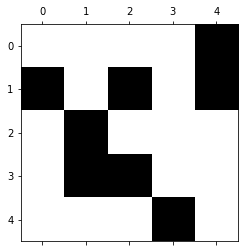

In [23]:
if __name__ == "__main__":
    size_of_matrix = 5
    np_array = populateMatrix(size_of_matrix,0.5)
    maze = np.asmatrix(np_array)

    np_array = populateMatrix(size_of_matrix,0)
    agent_matrix = np.asmatrix(np_array)
    

    maze = np.matrix(maze)
    plt.spy(maze)

Nodes visited:  []
current_node: (0, 0, 0)
recorded_visits [(0, 0)]
Updated open list:  [(1, 0, 1), (0, 1, 1)]
Number_of_steps covered so far:  1
Trajectory_path:  [(0, 0)]


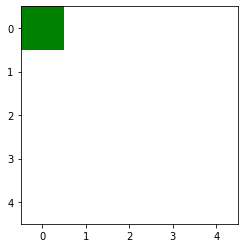

current_node: (1, 0, 1)
path blocked from (1, 0, 1) backtracking and attempting to Traversing again from node:  (0, 0, 1)
current_node: (0, 1, 1)
recorded_visits [(0, 0), (1, 0), (0, 1)]
Updated open list:  [(1, 1, 2), (0, 2, 2), (0, 0, 1), (0, 0, 2)]
Number_of_steps covered so far:  3
Trajectory_path:  [(0, 0), (0, 1)]


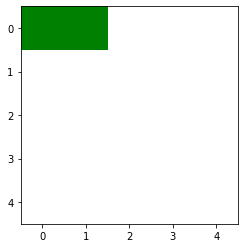

current_node: (1, 1, 2)
recorded_visits [(0, 0), (1, 0), (0, 1), (1, 1)]
Updated open list:  [(2, 1, 3), (1, 2, 3), (0, 2, 2), (0, 1, 3), (0, 0, 1), (0, 0, 2)]
Number_of_steps covered so far:  4
Trajectory_path:  [(0, 0), (0, 1), (1, 1)]


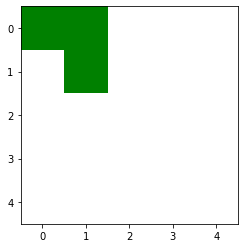

Nodes visited:  []
current_node: (0, 0, 0)
recorded_visits [(0, 0)]
Updated open list:  [(0, 1, 1)]
Number_of_steps covered so far:  5
Trajectory_path:  [(0, 0)]


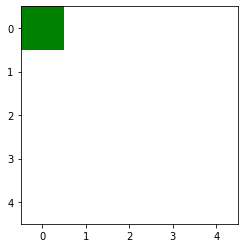

current_node: (0, 1, 1)
recorded_visits [(0, 0), (0, 1)]
Updated open list:  [(0, 2, 2), (0, 0, 2)]
Number_of_steps covered so far:  6
Trajectory_path:  [(0, 0), (0, 1)]


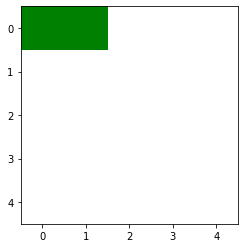

current_node: (0, 2, 2)
recorded_visits [(0, 0), (0, 1), (0, 2)]
Updated open list:  [(1, 2, 3), (0, 3, 3), (0, 1, 3), (0, 0, 2)]
Number_of_steps covered so far:  7
Trajectory_path:  [(0, 0), (0, 1), (0, 2)]


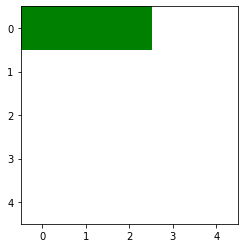

current_node: (1, 2, 3)
path blocked from (1, 2, 3) backtracking and attempting to Traversing again from node:  (0, 2, 3)
current_node: (0, 3, 3)
recorded_visits [(0, 0), (0, 1), (0, 2), (1, 2), (0, 3)]
Updated open list:  [(1, 3, 4), (0, 4, 4), (0, 2, 3), (0, 2, 4), (0, 1, 3), (0, 0, 2)]
Number_of_steps covered so far:  9
Trajectory_path:  [(0, 0), (0, 1), (0, 2), (0, 3)]


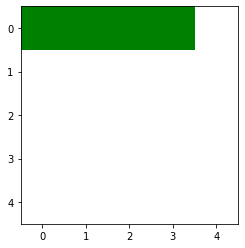

current_node: (1, 3, 4)
recorded_visits [(0, 0), (0, 1), (0, 2), (1, 2), (0, 3), (1, 3)]
Updated open list:  [(2, 3, 5), (1, 4, 5), (0, 4, 4), (0, 3, 5), (0, 2, 3), (0, 2, 4), (0, 1, 3), (0, 0, 2)]
Number_of_steps covered so far:  10
Trajectory_path:  [(0, 0), (0, 1), (0, 2), (0, 3), (1, 3)]


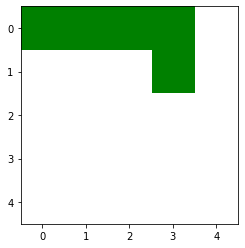

current_node: (2, 3, 5)
recorded_visits [(0, 0), (0, 1), (0, 2), (1, 2), (0, 3), (1, 3), (2, 3)]
Updated open list:  [(3, 3, 6), (2, 4, 6), (1, 4, 5), (0, 4, 4), (1, 3, 6), (2, 2, 6), (0, 3, 5), (0, 2, 3), (0, 2, 4), (0, 1, 3), (0, 0, 2)]
Number_of_steps covered so far:  11
Trajectory_path:  [(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (2, 3)]


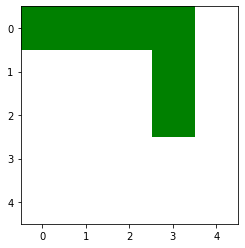

current_node: (3, 3, 6)
recorded_visits [(0, 0), (0, 1), (0, 2), (1, 2), (0, 3), (1, 3), (2, 3), (3, 3)]
Updated open list:  [(4, 3, 7), (3, 4, 7), (2, 4, 6), (1, 4, 5), (2, 3, 7), (3, 2, 7), (0, 4, 4), (1, 3, 6), (2, 2, 6), (0, 3, 5), (0, 2, 3), (0, 2, 4), (0, 1, 3), (0, 0, 2)]
Number_of_steps covered so far:  12
Trajectory_path:  [(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (2, 3), (3, 3)]


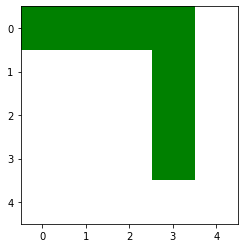

current_node: (4, 3, 7)
path blocked from (4, 3, 7) backtracking and attempting to Traversing again from node:  (3, 3, 7)
current_node: (3, 4, 7)
recorded_visits [(0, 0), (0, 1), (0, 2), (1, 2), (0, 3), (1, 3), (2, 3), (3, 3), (4, 3), (3, 4)]
Updated open list:  [(4, 4, 8), (2, 4, 6), (3, 3, 7), (2, 4, 8), (3, 3, 8), (1, 4, 5), (2, 3, 7), (3, 2, 7), (0, 4, 4), (1, 3, 6), (2, 2, 6), (0, 3, 5), (0, 2, 3), (0, 2, 4), (0, 1, 3), (0, 0, 2)]
Number_of_steps covered so far:  14
Trajectory_path:  [(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (2, 3), (3, 3), (3, 4)]


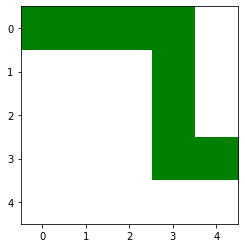

current_node: (4, 4, 8)
Reached Goal!!!!!!!!!!!!!!!!!!!!!!!


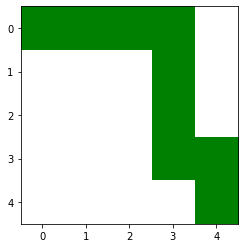

number_of_steps 15
The number of cells processed: 11


In [24]:
number_of_steps = 0
trajectory_path, goal_reached, number_of_steps, visited_list = repeated_astar(maze, agent_matrix, number_of_steps, size_of_matrix)
print("The number of cells processed:", len(visited_list))

In [11]:
agent_matrix

matrix([[0, 1, 1, 1, 1],
        [1, 1, 1, 1, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]])